<a href="https://colab.research.google.com/github/likeaAI/python_code/blob/main/%EC%A3%BC%EC%8B%9D%ED%88%AC%EC%9E%90%EC%83%9D%EC%A1%B4%EC%A0%84%EB%9E%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9Dchatgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


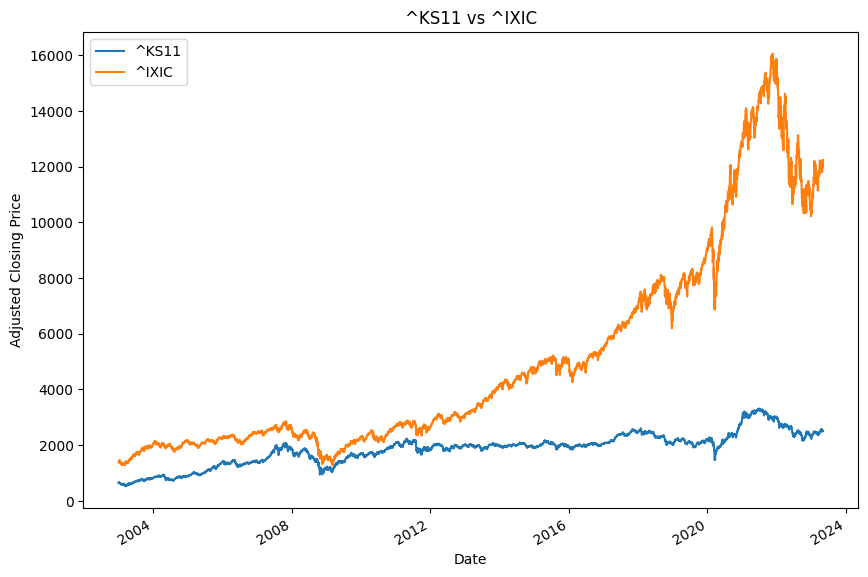

In [ ]:
!pip install yfinance

import yfinance as yf
import matplotlib.pyplot as plt

def compare_indices(index1, index2, start_date='2003-01-01', end_date='2023-05-06'):
    data1 = yf.download(index1, start=start_date, end=end_date)
    data2 = yf.download(index2, start=start_date, end=end_date)

    data1['Adj Close'].plot(label=index1, figsize=(10, 7))
    data2['Adj Close'].plot(label=index2)
    plt.title(f'{index1} vs {index2}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Closing Price')
    plt.legend()
    plt.show()

compare_indices('^KS11', '^IXIC')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


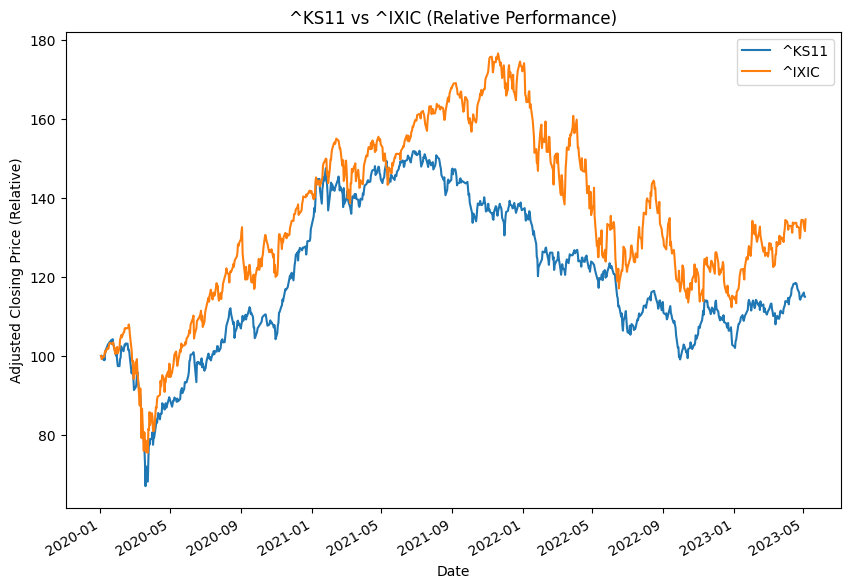

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


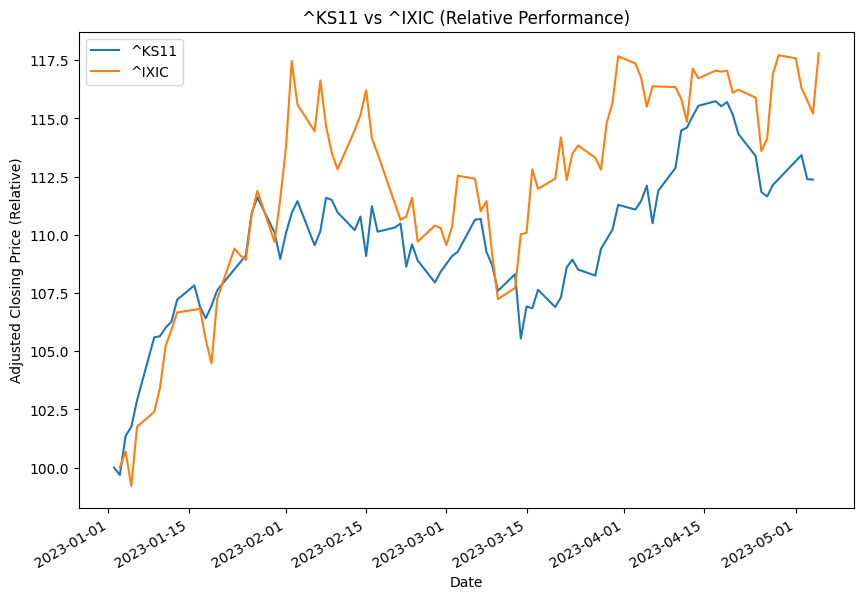

In [ ]:


def compare_indices_relative(index1, index2, start_date='2020-01-01', end_date='2023-05-06'):
    data1 = yf.download(index1, start=start_date, end=end_date)
    data2 = yf.download(index2, start=start_date, end=end_date)
    
    # Normalize the data by setting the starting value to 100
    data1_normalized = data1['Adj Close'] / data1['Adj Close'].iloc[0] * 100
    data2_normalized = data2['Adj Close'] / data2['Adj Close'].iloc[0] * 100
    
    data1_normalized.plot(label=index1, figsize=(10, 7))
    data2_normalized.plot(label=index2)
    plt.title(f'{index1} vs {index2} (Relative Performance)')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Closing Price (Relative)')
    plt.legend()
    plt.show()

compare_indices_relative('^KS11', '^IXIC')

def compare_indices_relative2(index1, index2, start_date='2023-01-01', end_date='2023-05-06'):
    data1 = yf.download(index1, start=start_date, end=end_date)
    data2 = yf.download(index2, start=start_date, end=end_date)
    
    # Normalize the data by setting the starting value to 100
    data1_normalized = data1['Adj Close'] / data1['Adj Close'].iloc[0] * 100
    data2_normalized = data2['Adj Close'] / data2['Adj Close'].iloc[0] * 100
    
    data1_normalized.plot(label=index1, figsize=(10, 7))
    data2_normalized.plot(label=index2)
    plt.title(f'{index1} vs {index2} (Relative Performance)')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Closing Price (Relative)')
    plt.legend()
    plt.show()

compare_indices_relative2('^KS11', '^IXIC')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed


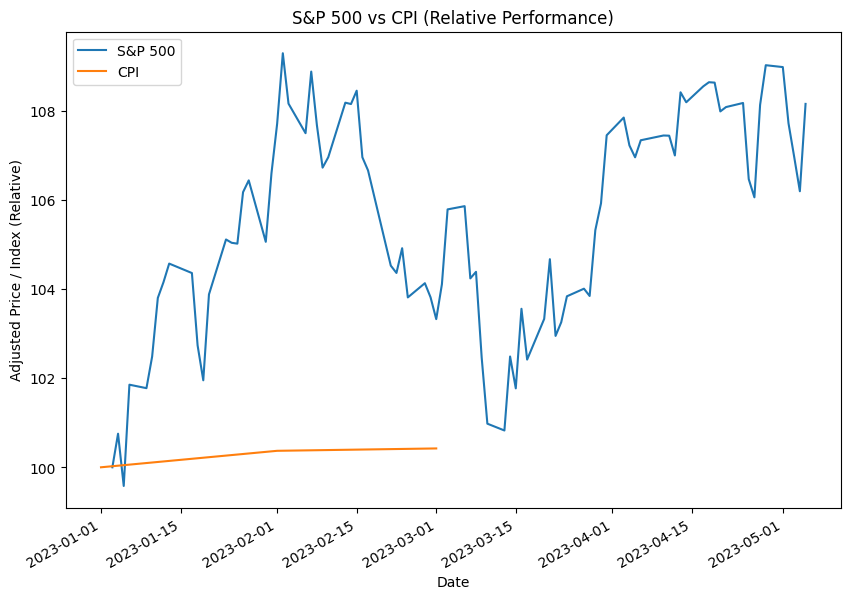

In [3]:
!pip install fredapi

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

def compare_cpi_and_sp500(api_key, start_date='2023-01-01', end_date='2023-05-06'):
    # Get S&P 500 data
    sp500_data = yf.download('^GSPC', start=start_date, end=end_date)
    sp500_normalized = sp500_data['Adj Close'] / sp500_data['Adj Close'].iloc[0] * 100

    # Get CPI data
    fred = Fred(api_key='32425e4d65b16b230d8028519432f0d8')
    cpi_data = fred.get_series('CPIAUCSL', start_date, end_date, frequency='m')
    cpi_data = pd.DataFrame(cpi_data, columns=['CPI'])
    cpi_normalized = cpi_data['CPI'] / cpi_data['CPI'].iloc[0] * 100

    # Plot the data
    sp500_normalized.plot(label='S&P 500', figsize=(10, 7))
    cpi_normalized.plot(label='CPI')
    plt.title('S&P 500 vs CPI (Relative Performance)')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Price / Index (Relative)')
    plt.legend()
    plt.show()

compare_cpi_and_sp500('YOUR_FRED_API_KEY')


[*********************100%***********************]  1 of 1 completed
                  Close          Max          Min   Bull   Bear
Date                                                           
1990-01-02   359.690002   359.690002   359.690002  False  False
1990-01-03   358.760010   359.690002   358.760010  False  False
1990-01-04   355.670013   359.690002   355.670013  False  False
1990-01-05   352.200012   359.690002   352.200012  False  False
1990-01-08   353.790009   359.690002   352.200012  False  False
...                 ...          ...          ...    ...    ...
2023-05-01  4167.870117  4305.200195  3577.030029  False  False
2023-05-02  4119.580078  4305.200195  3577.030029  False  False
2023-05-03  4090.750000  4305.200195  3577.030029  False  False
2023-05-04  4061.219971  4305.200195  3577.030029  False  False
2023-05-05  4136.250000  4305.200195  3577.030029  False  False

[8401 rows x 5 columns]


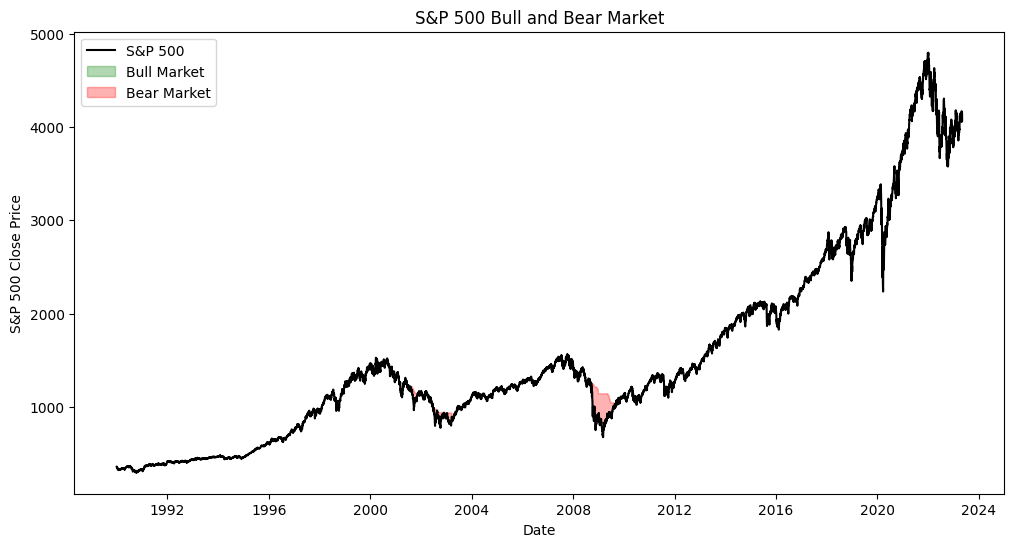

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# S&P 500 지수 데이터 다운로드
sp500 = yf.download('^GSPC', start='1990-01-01')

# S&P 500 지수의 종가를 기준으로 최고점과 최저점 계산
sp500['Max'] = sp500['Close'].rolling(window=252, min_periods=1).max()
sp500['Min'] = sp500['Close'].rolling(window=252, min_periods=1).min()

# 강세장 및 약세장 기준 확인
sp500['Bull'] = sp500['Close'] >= sp500['Max'] * 1.2
sp500['Bear'] = sp500['Close'] <= sp500['Max'] * 0.8

# 결과 출력
print(sp500[['Close', 'Max', 'Min', 'Bull', 'Bear']])

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(sp500.index, sp500['Close'], label='S&P 500', color='k')
plt.fill_between(sp500.index, sp500['Close'], sp500['Max'] * 1.2, where=sp500['Bull'], color='g', alpha=0.3, label='Bull Market')
plt.fill_between(sp500.index, sp500['Close'], sp500['Max'] * 0.8, where=sp500['Bear'], color='r', alpha=0.3, label='Bear Market')
plt.xlabel('Date')
plt.ylabel('S&P 500 Close Price')
plt.title('S&P 500 Bull and Bear Market')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
                  Close          Max          Min   Bull   Bear
Date                                                           
2000-01-03  1455.219971  1455.219971  1455.219971  False  False
2000-01-04  1399.420044  1455.219971  1399.420044  False  False
2000-01-05  1402.109985  1455.219971  1399.420044  False  False
2000-01-06  1403.449951  1455.219971  1399.420044  False  False
2000-01-07  1441.469971  1455.219971  1399.420044  False  False
...                 ...          ...          ...    ...    ...
2023-05-01  4167.870117  4305.200195  3577.030029  False  False
2023-05-02  4119.580078  4305.200195  3577.030029  False  False
2023-05-03  4090.750000  4305.200195  3577.030029  False  False
2023-05-04  4061.219971  4305.200195  3577.030029  False  False
2023-05-05  4136.250000  4305.200195  3577.030029  False  False

[5873 rows x 5 columns]


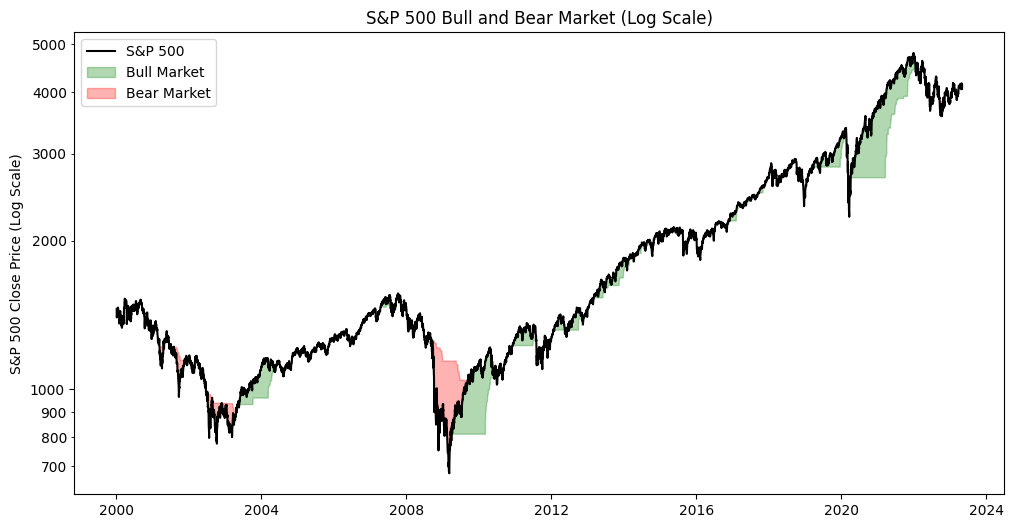

Bull Market Count: 71
Bear Market Count: 37


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# S&P 500 지수 데이터 다운로드
sp500 = yf.download('^GSPC', start='2000-01-01')

# S&P 500 지수의 종가를 기준으로 최고점과 최저점 계산
sp500['Max'] = sp500['Close'].rolling(window=252, min_periods=1).max()
sp500['Min'] = sp500['Close'].rolling(window=252, min_periods=1).min()

# 강세장 및 약세장 기준 확인
sp500['Bull'] = sp500['Close'] >= sp500['Min'] * 1.2
sp500['Bear'] = sp500['Close'] <= sp500['Max'] * 0.8

# 결과 출력
print(sp500[['Close', 'Max', 'Min', 'Bull', 'Bear']])

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sp500.index, sp500['Close'], label='S&P 500', color='k')
ax.fill_between(sp500.index, sp500['Close'], sp500['Min'] * 1.2, where=sp500['Bull'], color='g', alpha=0.3, label='Bull Market')
ax.fill_between(sp500.index, sp500['Close'], sp500['Max'] * 0.8, where=sp500['Bear'], color='r', alpha=0.3, label='Bear Market')

# 로그 스케일로 변경
ax.set_yscale('log')

# y축 레이블과 타이틀 변경
ax.set_ylabel('S&P 500 Close Price (Log Scale)')
ax.set_title('S&P 500 Bull and Bear Market (Log Scale)')

# y축에 로그 스케일의 눈금 표시
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())

# 범례 표시
ax.legend()

# 그래프 출력
plt.show()


# 강세장 및 약세장 구간의 시작점 찾기
sp500['Bull_start'] = (sp500['Bull'] & ~sp500['Bull'].shift(1).fillna(False))
sp500['Bear_start'] = (sp500['Bear'] & ~sp500['Bear'].shift(1).fillna(False))

# 강세장 및 약세장 횟수 계산
bull_count = sp500['Bull_start'].sum()
bear_count = sp500['Bear_start'].sum()

print("Bull Market Count:", bull_count)
print("Bear Market Count:", bear_count)


[*********************100%***********************]  1 of 1 completed
                  Close          Max          Min   Bull   Bear
Date                                                           
2000-01-04  1059.040039  1059.040039  1059.040039  False  False
2000-01-05   986.309998  1059.040039   986.309998  False  False
2000-01-06   960.789978  1059.040039   960.789978  False  False
2000-01-07   948.650024  1059.040039   948.650024  False  False
2000-01-10   987.239990  1059.040039   948.650024  False  False
...                 ...          ...          ...    ...    ...
2023-04-27  2495.810059  2704.709961  2155.489990   True  False
2023-04-28  2501.530029  2695.050049  2155.489990   True  False
2023-05-02  2524.389893  2695.050049  2155.489990   True  False
2023-05-03  2501.399902  2695.050049  2155.489990   True  False
2023-05-04  2500.939941  2695.050049  2155.489990   True  False

[5757 rows x 5 columns]


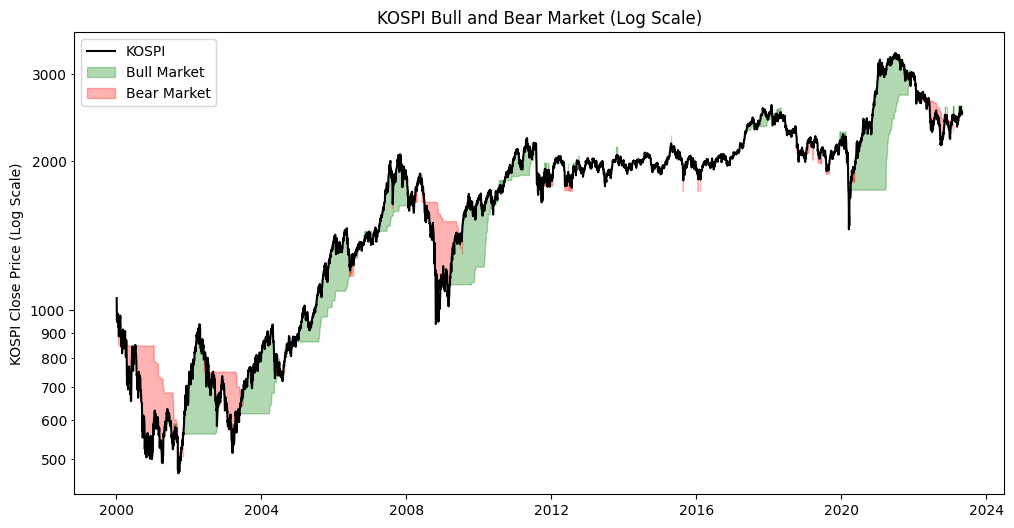

Bull Market Count: 63
Bear Market Count: 52


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 코스피 지수 데이터 다운로드
kospi = yf.download('^KS11', start='2000-01-01')

# 코스피 지수의 종가를 기준으로 최고점과 최저점 계산
kospi['Max'] = kospi['Close'].rolling(window=252, min_periods=1).max()
kospi['Min'] = kospi['Close'].rolling(window=252, min_periods=1).min()

# 강세장 및 약세장 기준 확인  
kospi['Bull'] = kospi['Close'] >= kospi['Min'] * 1.15
kospi['Bear'] = kospi['Close'] <= kospi['Max'] * 0.85

# 결과 출력
print(kospi[['Close', 'Max', 'Min', 'Bull', 'Bear']])

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(kospi.index, kospi['Close'], label='KOSPI', color='k')
ax.fill_between(kospi.index, kospi['Close'], kospi['Min'] * 1.2, where=kospi['Bull'], color='g', alpha=0.3, label='Bull Market')
ax.fill_between(kospi.index, kospi['Close'], kospi['Max'] * 0.8, where=kospi['Bear'], color='r', alpha=0.3, label='Bear Market')

# 로그 스케일로 변경
ax.set_yscale('log')

# y축 레이블과 타이틀 변경
ax.set_ylabel('KOSPI Close Price (Log Scale)')
ax.set_title('KOSPI Bull and Bear Market (Log Scale)')

# y축에 로그 스케일의 눈금 표시
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.set_minor_formatter(mticker.ScalarFormatter())

# 범례 표시
ax.legend()

# 그래프 출력
plt.show()

# 강세장 및 약세장 구간의 시작점 찾기
kospi['Bull_start'] = (kospi['Bull'] & ~kospi['Bull'].shift(1).fillna(False))
kospi['Bear_start'] = (kospi['Bear'] & ~kospi['Bear'].shift(1).fillna(False))

# 강세장 및 약세장 횟수 계산
bull_count = kospi['Bull_start'].sum()
bear_count = kospi['Bear_start'].sum()

print("Bull Market Count:", bull_count)
print("Bear Market Count:", bear_count)


{'RESULT': {'CODE': 'ERROR-100', 'MESSAGE': '필수 값이 누락되어 있습니다. 필수 값을 확인하십시오!\\n 필수 값이 누락되어 있으면 오류를 발생합니다. 요청 변수를 참고 하십시오!'}}
[*********************100%***********************]  1 of 1 completed


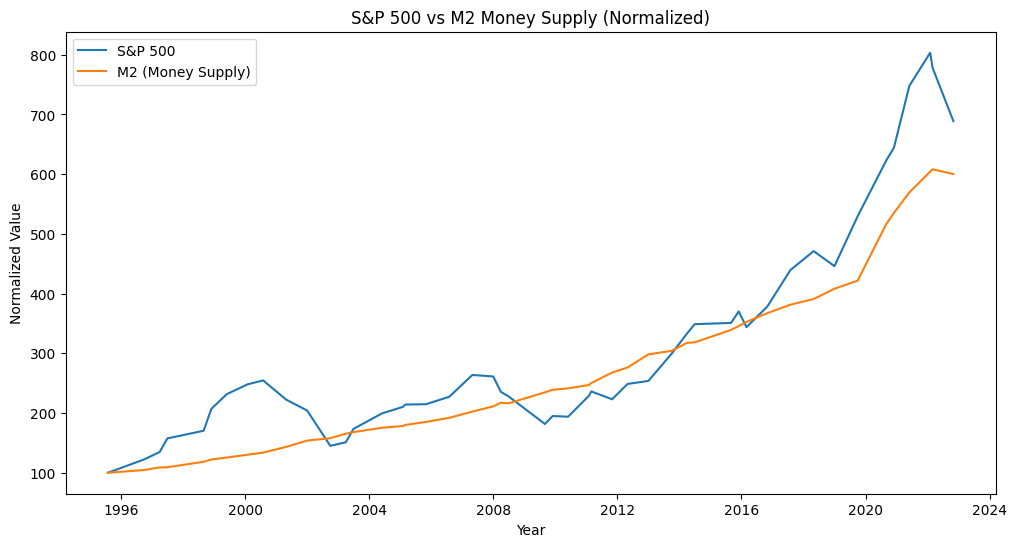

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# FRED API 키 입력
api_key = '32425e4d65b16b230d8028519432f0d8'
fred = Fred(api_key=api_key)


# API 응답 확인
print(exports_json)


# S&P 500 데이터 다운로드
sp500 = yf.download('^GSPC', start='1995-01-01')['Close']

# M2 데이터 다운로드 (달러 표기, 월별 데이터)
m2 = fred.get_series('WM2NS', '1995-01-01')

# 데이터 정리 및 병합
sp500 = sp500.resample('M').last()
data = pd.concat([sp500, m2], axis=1)
data.columns = ['S&P 500', 'M2']
data.dropna(inplace=True)

# 데이터 정규화
data_normalized = data / data.iloc[0] * 100

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(data_normalized.index, data_normalized['S&P 500'], label='S&P 500')
plt.plot(data_normalized.index, data_normalized['M2'], label='M2 (Money Supply)')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('S&P 500 vs M2 Money Supply (Normalized)')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


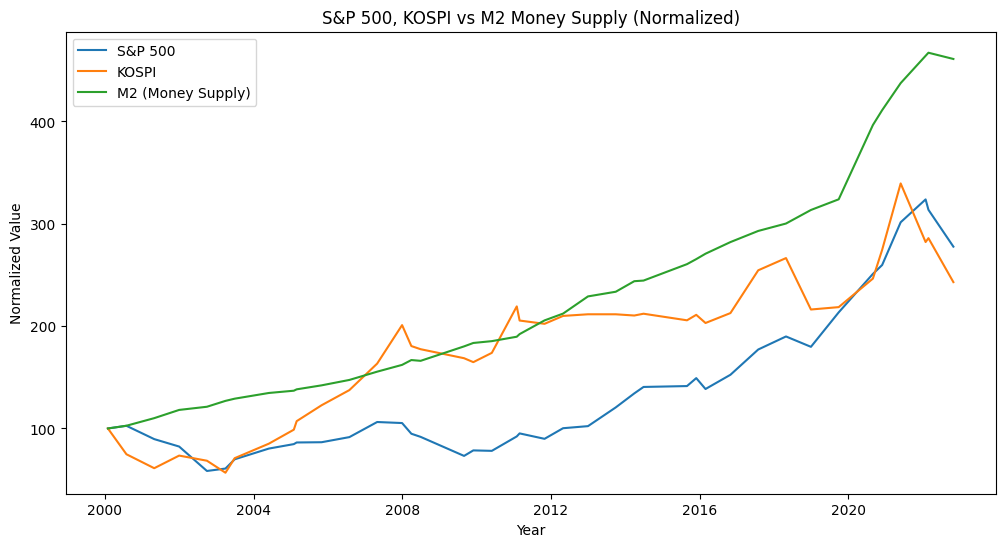

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# FRED API 키 입력
api_key = '32425e4d65b16b230d8028519432f0d8'
fred = Fred(api_key=api_key)

# S&P 500 데이터 다운로드
sp500 = yf.download('^GSPC', start='2000-01-01')['Close']

# 코스피 데이터 다운로드
kospi = yf.download('^KS11', start='2000-01-01')['Close']

# M2 데이터 다운로드 (달러 표기, 월별 데이터)
m2 = fred.get_series('WM2NS', '2000-01-01')

# 데이터 정리 및 병합
sp500 = sp500.resample('M').last()
kospi = kospi.resample('M').last()
data = pd.concat([sp500, kospi, m2], axis=1)
data.columns = ['S&P 500', 'KOSPI', 'M2']
data.dropna(inplace=True)

# 데이터 정규화
data_normalized = data / data.iloc[0] * 100

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(data_normalized.index, data_normalized['S&P 500'], label='S&P 500')
plt.plot(data_normalized.index, data_normalized['KOSPI'], label='KOSPI')
plt.plot(data_normalized.index, data_normalized['M2'], label='M2 (Money Supply)')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('S&P 500, KOSPI vs M2 Money Supply (Normalized)')
plt.legend()
plt.show()


In [ ]:
# 한국수출입 통계 자료 
# api 필요 

#api_key = 'EBPME2W8J2A1RAGMEAAZ'
!pip install PublicDataReader --upgrade




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,용어,용어설명
0,소비자동향지수,"소비자들이 느끼는 경기, 소비지출계획, 생활형편 등 경제에 대한 전반적인 인식을 조..."


In [ ]:
from PublicDataReader import Ecos
service_key = 'EBPME2W8J2A1RAGMEAAZ'
api = Ecos(service_key)

df = api.get_statistic_search(통계표코드="200Y001", 주기="A", 검색시작일자="2015", 검색종료일자="2021")
df.head()

,통계표코드,통계명,통계항목코드1,통계항목명1,통계항목코드2,통계항목명2,통계항목코드3,통계항목명3,통계항목코드4,통계항목명4,단위,시점,값
0,200Y001,2.1.1.1. 주요지표(연간지표),10101,"국내총생산(명목, 원화표시)",None,None,None,None,None,None,십억원,2015,1658020.4
1,200Y001,2.1.1.1. 주요지표(연간지표),10101,"국내총생산(명목, 원화표시)",None,None,None,None,None,None,십억원,2016,1740779.6
2,200Y001,2.1.1.1. 주요지표(연간지표),10101,"국내총생산(명목, 원화표시)",None,None,None,None,None,None,십억원,2017,1835698.2
3,200Y001,2.1.1.1. 주요지표(연간지표),10101,"국내총생산(명목, 원화표시)",None,None,None,None,None,None,십억원,2018,1898192.6
4,200Y001,2.1.1.1. 주요지표(연간지표),10101,"국내총생산(명목, 원화표시)",None,None,None,None,None,None,십억원,2019,1924498.1


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


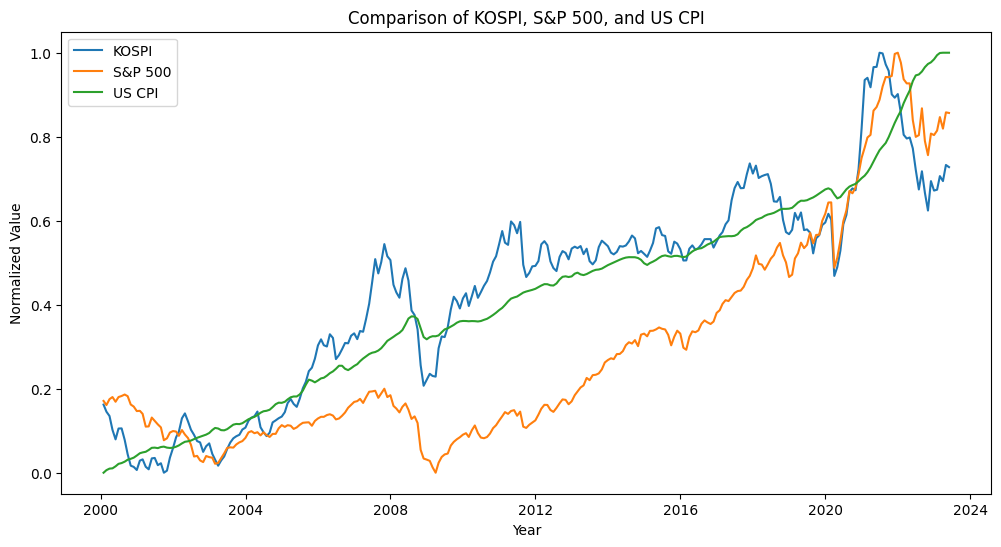

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# yfinance로부터 S&P 500과 코스피 지수 다운로드
sp500 = yf.download('^GSPC', start='2000-01-01')['Close']
kospi = yf.download('^KS11', start='2000-01-01')['Close']

# FRED API 키를 입력하고 미국 CPI 데이터를 다운로드
fred_api_key = '32425e4d65b16b230d8028519432f0d8'
fred = Fred(api_key=fred_api_key)
us_cpi = pd.DataFrame(fred.get_series('CPIAUCSL', '2000-01-01'))

# 데이터를 하나의 데이터프레임으로 병합
data = pd.concat([kospi, sp500, us_cpi], axis=1)
data.columns = ['KOSPI', 'S&P 500', 'US CPI']


# 결측값을 보간
data.interpolate(method='time', inplace=True)

# 결측값 처리
data = data.dropna()

# 인덱스를 기준으로 일별 데이터를 월별로 변경
data = data.resample('M').mean()

# 데이터 정규화
normalized_data = (data - data.min()) / (data.max() - data.min())

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(normalized_data['KOSPI'], label='KOSPI')
plt.plot(normalized_data['S&P 500'], label='S&P 500')
plt.plot(normalized_data['US CPI'], label='US CPI')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Comparison of KOSPI, S&P 500, and US CPI')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


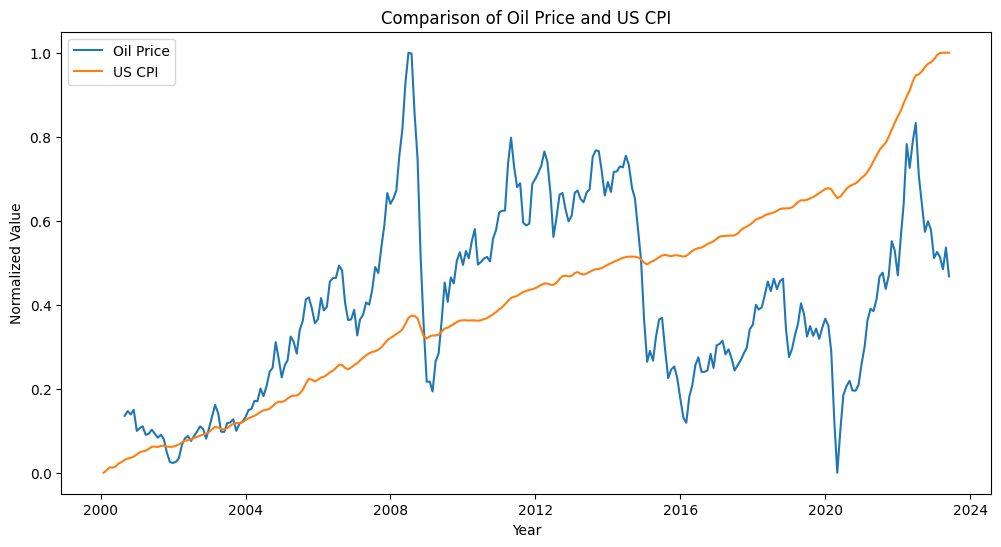

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import yfinance as yf

# FRED API 키를 입력하고 미국 CPI 데이터를 다운로드
fred_api_key = '32425e4d65b16b230d8028519432f0d8'
fred = Fred(api_key=fred_api_key)
us_cpi = pd.DataFrame(fred.get_series('CPIAUCSL', '2000-01-01'))

# yfinance를 사용하여 국제유가 (WTI Crude Oil) 다운로드
oil_price = yf.download('CL=F', start='2000-01-01')['Close']

# 데이터를 하나의 데이터프레임으로 병합
data = pd.concat([oil_price, us_cpi], axis=1)
data.columns = ['Oil Price', 'US CPI']

# 결측값을 보간
data.interpolate(method='time', inplace=True)

# 인덱스를 기준으로 일별 데이터를 월별로 변경
data = data.resample('M').mean()

# 데이터 정규화
normalized_data = (data - data.min()) / (data.max() - data.min())

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(normalized_data['Oil Price'], label='Oil Price')
plt.plot(normalized_data['US CPI'], label='US CPI')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Comparison of Oil Price and US CPI')
plt.legend()
plt.show()


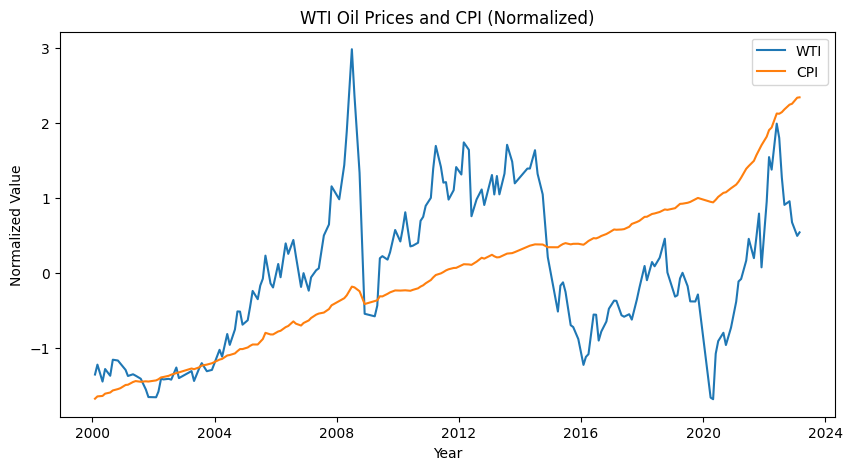

In [12]:
# 그래프 범위 수정 -2 ~ 2 

import pandas as pd
import datetime
import matplotlib.pyplot as plt
from fredapi import Fred

# 발급받은 FRED API 키 입력
api_key =  '32425e4d65b16b230d8028519432f0d8'
fred = Fred(api_key=api_key)

# 데이터를 가져올 기간 설정
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime.now()

# FRED API를 사용하여 유가(WTI) 데이터 가져오기
oil_data = pd.DataFrame(fred.get_series('DCOILWTICO', start_date, end_date))
oil_data.columns = ['WTI']

# FRED API를 사용하여 미국 CPI 데이터 가져오기 (월간 데이터)
cpi_data = pd.DataFrame(fred.get_series('CPIAUCSL', start_date, end_date, frequency='m'))
cpi_data.columns = ['CPI']

# 데이터 프레임 병합
merged_data = pd.concat([oil_data, cpi_data], axis=1)

# 결측값 제거
merged_data.dropna(inplace=True)

# 데이터 정규화
normalized_data = (merged_data - merged_data.mean()) / (merged_data.std())

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(normalized_data.index, normalized_data['WTI'], label='WTI')
plt.plot(normalized_data.index, normalized_data['CPI'], label='CPI')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.legend()
plt.title('WTI Oil Prices and CPI (Normalized)')
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


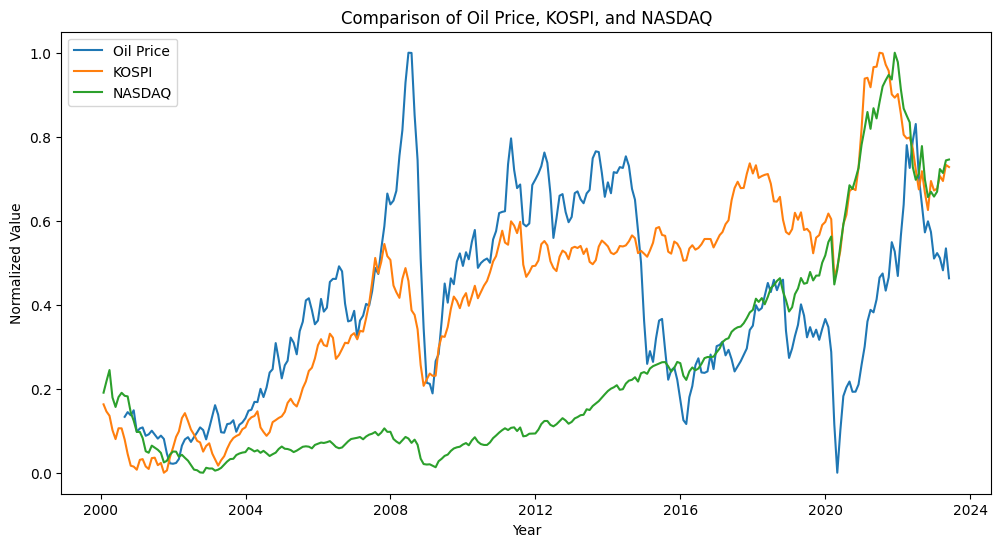

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# yfinance를 사용하여 국제유가 (WTI Crude Oil), 코스피, 나스닥 다운로드
oil_price = yf.download('CL=F', start='2000-01-01')['Close']
kospi = yf.download('^KS11', start='2000-01-01')['Close']
nasdaq = yf.download('^IXIC', start='2000-01-01')['Close']

# 데이터를 하나의 데이터프레임으로 병합
data = pd.concat([oil_price, kospi, nasdaq], axis=1)
data.columns = ['Oil Price', 'KOSPI', 'NASDAQ']

# 결측값을 보간
data.interpolate(method='time', inplace=True)

# 인덱스를 기준으로 일별 데이터를 월별로 변경
data = data.resample('M').mean()

# 데이터 정규화
normalized_data = (data - data.min()) / (data.max() - data.min())

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(normalized_data['Oil Price'], label='Oil Price')
plt.plot(normalized_data['KOSPI'], label='KOSPI')
plt.plot(normalized_data['NASDAQ'], label='NASDAQ')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Comparison of Oil Price, KOSPI, and NASDAQ')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


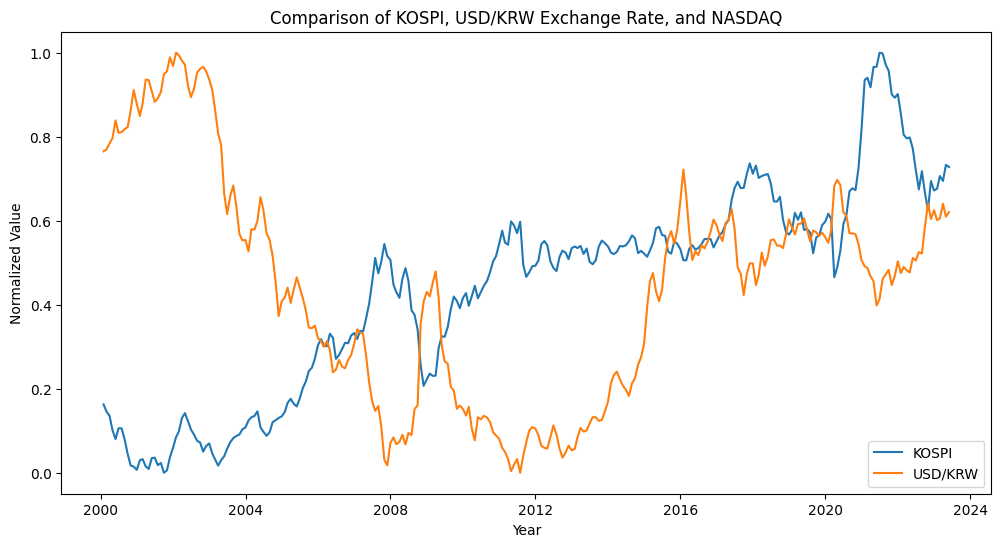

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as pdr

# yfinance를 사용하여 코스피, 나스닥 다운로드
kospi = yf.download('^KS11', start='2000-01-01')['Close']
nasdaq = yf.download('^IXIC', start='2000-01-01')['Close']

# pandas_datareader를 사용하여 원/달러 환율 다운로드 (FRED 데이터 소스 사용)
usdkrw = pdr.get_data_fred('DEXCAUS', start='2000-01-01')['DEXCAUS']

# 데이터를 하나의 데이터프레임으로 병합
data = pd.concat([kospi, usdkrw, nasdaq], axis=1)
data.columns = ['KOSPI', 'USD/KRW', 'NASDAQ']

# 결측값을 보간
data.interpolate(method='time', inplace=True)

# 인덱스를 기준으로 일별 데이터를 월별로 변경
data = data.resample('M').mean()

# 데이터 정규화
normalized_data = (data - data.min()) / (data.max() - data.min())

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(normalized_data['KOSPI'], label='KOSPI')
plt.plot(normalized_data['USD/KRW'], label='USD/KRW')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.title('Comparison of KOSPI, USD/KRW Exchange Rate)
plt.legend()
plt.show()


In [ ]:
!pip install pykrx


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 12.6 MB/s eta 0:00:00


            PAYEMS
DATE              
2010-01-01  129798
2010-02-01  129700
2010-03-01  129864
2010-04-01  130115
2010-05-01  130645
...            ...
2022-12-01  154535
2023-01-01  155007
2023-02-01  155255
2023-03-01  155420
2023-04-01  155673

[160 rows x 1 columns]


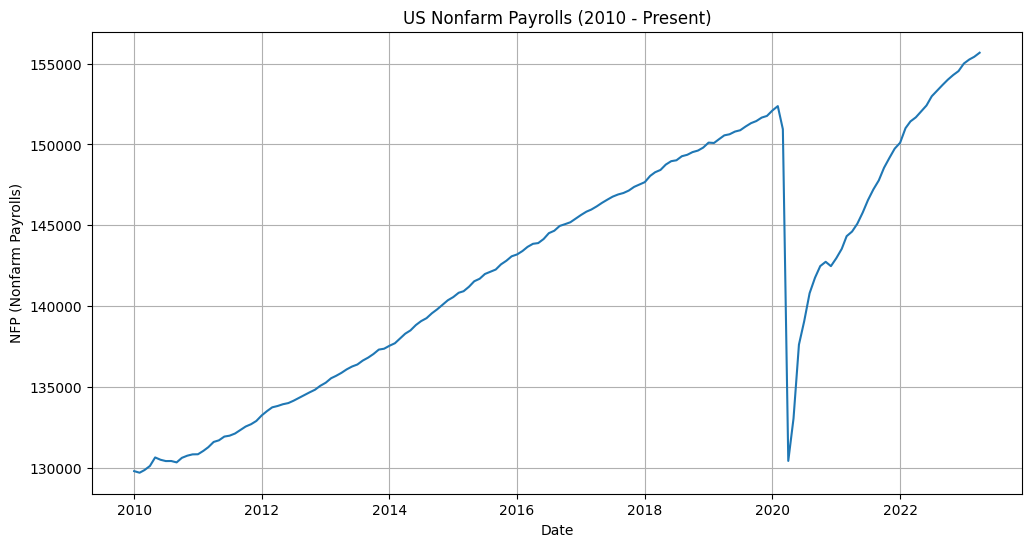

In [17]:
import pandas as pd
import pandas_datareader as pdr
import datetime

# 데이터를 가져올 기간 설정
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime.now()

# FRED API를 사용하여 NFP 데이터 가져오기
nfp_data = pdr.get_data_fred('PAYEMS', start_date, end_date)

# 데이터 출력
print(nfp_data)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(nfp_data.index, nfp_data['PAYEMS'])
plt.xlabel('Date')
plt.ylabel('NFP (Nonfarm Payrolls)')
plt.title('US Nonfarm Payrolls (2010 - Present)')
plt.grid(True)
plt.show()


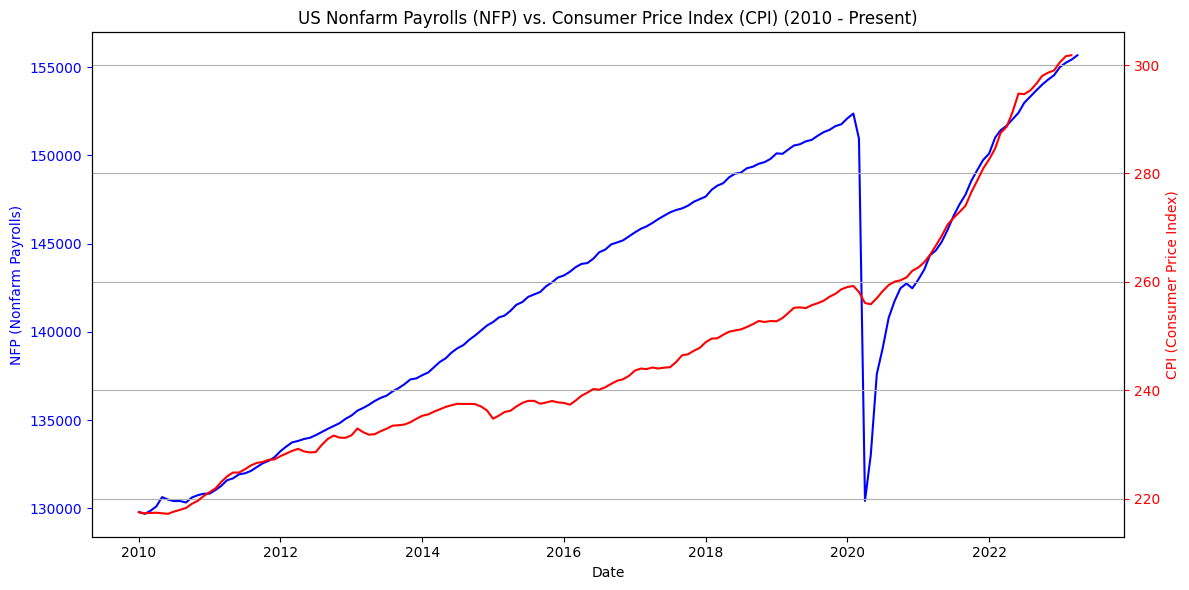

In [18]:
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt

# 데이터를 가져올 기간 설정
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime.now()

# FRED API를 사용하여 NFP 데이터 가져오기
nfp_data = pdr.get_data_fred('PAYEMS', start_date, end_date)

# FRED API를 사용하여 미국 인플레이션(CPI) 데이터 가져오기
cpi_data = pdr.get_data_fred('CPIAUCSL', start_date, end_date)

# 두 데이터프레임 합치기
combined_data = pd.concat([nfp_data, cpi_data], axis=1)

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(combined_data.index, combined_data['PAYEMS'], 'b-')
ax1.set_xlabel('Date')
ax1.set_ylabel('NFP (Nonfarm Payrolls)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(combined_data.index, combined_data['CPIAUCSL'], 'r-')
ax2.set_ylabel('CPI (Consumer Price Index)', color='r')
ax2.tick_params('y', colors='r')

plt.title('US Nonfarm Payrolls (NFP) vs. Consumer Price Index (CPI) (2010 - Present)')
plt.grid(True)
fig.tight_layout()
plt.show()


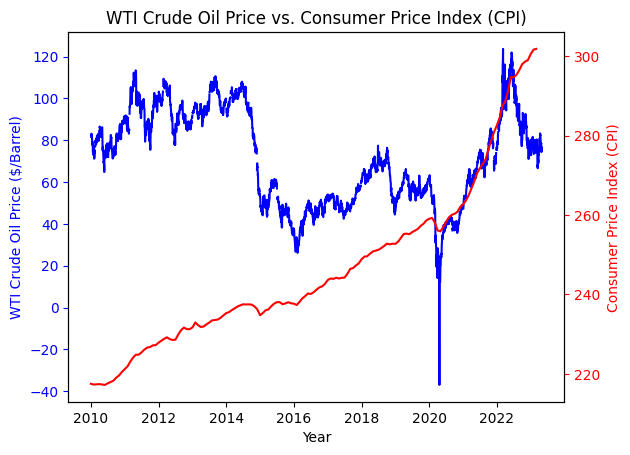

In [19]:
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt

# 데이터를 가져올 기간 설정
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime.now()

# FRED API를 사용하여 WTI유가 데이터 가져오기
oil_data = pdr.get_data_fred('DCOILWTICO', start_date, end_date)

# FRED API를 사용하여 CPI 데이터 가져오기
cpi_data = pdr.get_data_fred('CPIAUCSL', start_date, end_date)

# 그래프 그리기
fig, ax1 = plt.subplots()

# 유가 데이터 그래프
ax1.plot(oil_data.index, oil_data['DCOILWTICO'], 'b-')
ax1.set_xlabel('Year')
ax1.set_ylabel('WTI Crude Oil Price ($/Barrel)', color='b')
ax1.tick_params('y', colors='b')

# x축을 공유하는 새로운 y축 생성
ax2 = ax1.twinx()

# CPI 데이터 그래프
ax2.plot(cpi_data.index, cpi_data['CPIAUCSL'], 'r-')
ax2.set_ylabel('Consumer Price Index (CPI)', color='r')
ax2.tick_params('y', colors='r')

# 그래프 제목 및 보여주기
plt.title('WTI Crude Oil Price vs. Consumer Price Index (CPI)')
plt.show()


[*********************100%***********************]  1 of 1 completed


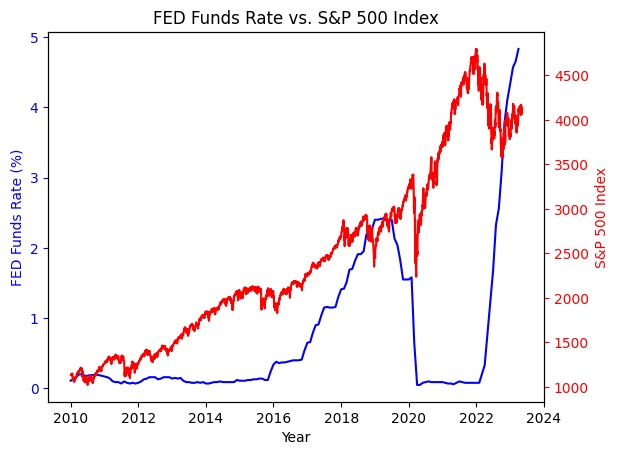

In [23]:
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# 데이터를 가져올 기간 설정
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime.now()

# FRED API를 사용하여 미국 기준금리 데이터 가져오기
us_interest_rate_data = pdr.get_data_fred('FEDFUNDS', start_date, end_date)

# yfinance를 사용하여 S&P 500 지수 데이터 가져오기
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# 그래프 그리기
fig, ax1 = plt.subplots()

# 미국 기준금리 데이터 그래프
ax1.plot(us_interest_rate_data.index, us_interest_rate_data['FEDFUNDS'], 'b-', label="FED Funds Rate")
ax1.set_xlabel('Year')
ax1.set_ylabel('FED Funds Rate (%)', color='b')
ax1.tick_params('y', colors='b')

# x축을 공유하는 새로운 y축 생성
ax2 = ax1.twinx()

# S&P 500 지수 데이터 그래프
ax2.plot(sp500_data.index, sp500_data['Close'], 'r-', label="S&P 500")
ax2.set_ylabel('S&P 500 Index', color='r')
ax2.tick_params('y', colors='r')

# 그래프 제목 및 보여주기
plt.title('FED Funds Rate vs. S&P 500 Index')
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


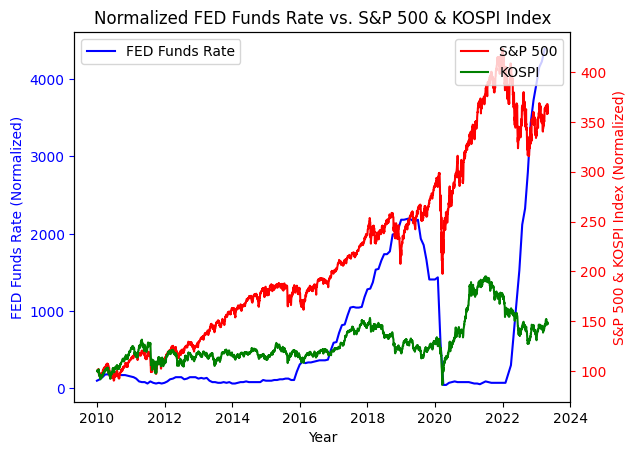

In [25]:
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# 데이터를 가져올 기간 설정
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime.now()

# FRED API를 사용하여 미국 기준금리 데이터 가져오기
us_interest_rate_data = pdr.get_data_fred('FEDFUNDS', start_date, end_date)

# yfinance를 사용하여 S&P 500 지수 데이터 가져오기
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# yfinance를 사용하여 KOSPI 지수 데이터 가져오기
kospi_data = yf.download('^KS11', start=start_date, end=end_date)

# 데이터 정규화
us_interest_rate_data_normalized = us_interest_rate_data / us_interest_rate_data.iloc[0] * 100
sp500_data_normalized = sp500_data['Close'] / sp500_data['Close'].iloc[0] * 100
kospi_data_normalized = kospi_data['Close'] / kospi_data['Close'].iloc[0] * 100

# 그래프 그리기
fig, ax1 = plt.subplots()

# 정규화된 미국 기준금리 데이터 그래프
ax1.plot(us_interest_rate_data_normalized.index, us_interest_rate_data_normalized['FEDFUNDS'], 'b-', label="FED Funds Rate")
ax1.set_xlabel('Year')
ax1.set_ylabel('FED Funds Rate (Normalized)', color='b')
ax1.tick_params('y', colors='b')

# x축을 공유하는 새로운 y축 생성
ax2 = ax1.twinx()

# 정규화된 S&P 500 지수 데이터 그래프
ax2.plot(sp500_data_normalized.index, sp500_data_normalized, 'r-', label="S&P 500")
ax2.plot(kospi_data_normalized.index, kospi_data_normalized, 'g-', label="KOSPI")
ax2.set_ylabel('S&P 500 & KOSPI Index (Normalized)', color='r')
ax2.tick_params('y', colors='r')

# 범례 추가
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 제목 및 보여주기
plt.title('Normalized FED Funds Rate vs. S&P 500 & KOSPI Index')
plt.show()
